In [1]:
## Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
### Importing the dataframe
df=pd.read_excel("NBA Data.xlsx",index_col=False)
df.head()

,Player,MJ,MC,Min,%T,%3PTS,%LF,REB,PAD,STL,BLK,Pts
0,Precious Achiuwa,174,64,20.62,47.41,34.90,56.08,6.03,0.85,0.53,0.77,8.76
1,Steven Adams,804,719,26.61,58.86,5.88,53.22,8.06,1.42,0.86,1.03,9.00
2,Bam Adebayo,115,108,32.63,55.48,10.65,70.48,8.53,2.49,0.81,0.88,14.91
3,Ochai Agbaji,190,147,28.81,43.84,36.47,75.21,3.64,1.46,0.76,0.45,11.74
4,Santi Aldama,142,46,21.48,46.50,31.90,69.89,5.23,1.31,0.60,0.73,10.01


In [3]:
## The column headers are french acronyms, we will switch them to English full hader names
old_headers=list(df.columns)
new_headers=['Player','Total Games Played','Total Games Played_Starting Linup',
                  'Average Minutes Played','Percentage Successful Shots','Percentage 3 PTS',
                  'Percentage Free Throws','Average Rebounds','Average Assists','Average Steals',
                  'Average Blocks','Points per Game']
dict_new_headers={old_headers[i]:new_headers[i] for i in range(len(old_headers))}
df=df.rename(columns=dict_new_headers)

### Expoloratory Data Analysis

 #### Career Longevity VS Performance

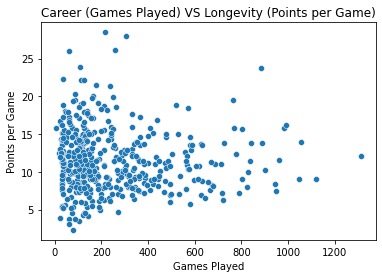

In [4]:
### Scatter plot that displays total games played and points per game score 
sns.scatterplot(data=df,x='Total Games Played',y='Points per Game')
plt.title('Career (Games Played) VS Longevity (Points per Game)')
plt.xlabel('Games Played')
plt.ylabel('Points per Game')
plt.show()

###### The scatterplot shows a high density of players scoring between 5–10 points per game regardless of the number of games played. While some players exhibit exceptional points per game for shorter careers, those who play more games tend to stabilize their performance at a moderate level.

 #### Experienced Players Impact

In [5]:
## We'll study whether players with more career games tend or not to have higher shoorting efficiency
correlation_t=df['Total Games Played'].corr(df['Percentage Successful Shots'])
correlation_3pts=df['Total Games Played'].corr(df['Percentage 3 PTS'])
print(f"Correlation between games played and percentage of successful shots: {correlation_t:.2f} ")
print(f"Correlation between games played and percentage of successful 3 point shorts: {correlation_3pts:.2f} ")

Correlation between games played and percentage of successful shots: 0.15 
Correlation between games played and percentage of successful 3 point shorts: 0.20 


###### Both metrics have no significant linear relationships as they are both close to zero

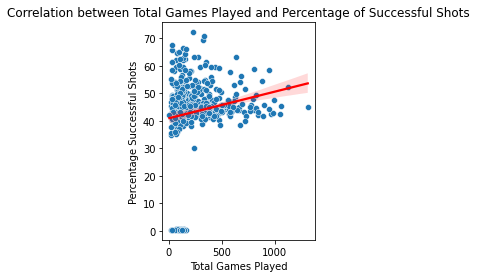

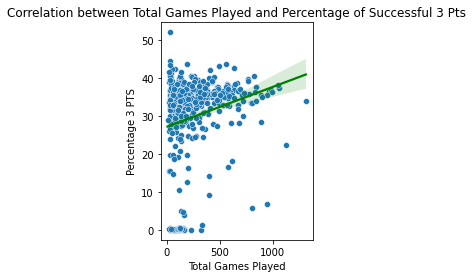

In [6]:
# Visualizing using a scatter plot 
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='Total Games Played',y='Percentage Successful Shots')
sns.regplot(x='Total Games Played',y='Percentage Successful Shots',data=df,scatter=False,color='red')
plt.title('Correlation between Total Games Played and Percentage of Successful Shots')
plt.show()
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='Total Games Played',y='Percentage 3 PTS')
sns.regplot(x='Total Games Played',y='Percentage 3 PTS',data=df,scatter=False,color='green')
plt.title('Correlation between Total Games Played and Percentage of Successful 3 Pts')
plt.show()

 #### Comparing Veterans to Newcomers

In [7]:
# We will segment players based on the number of games they played 0-200, 200-500, >=500
total_games=list(df['Total Games Played'])
category=[None for i in range(len(total_games))]
for i in range(len(total_games)):
    if total_games[i]<200:
        category[i]='Less than 200 games'
    elif total_games[i]<500:
        category[i]='Between 200 and 500 games'
    else:
        category[i]='More than 500 games'
df['Player Longevity_Category']=category

<BarContainer object of 3 artists>

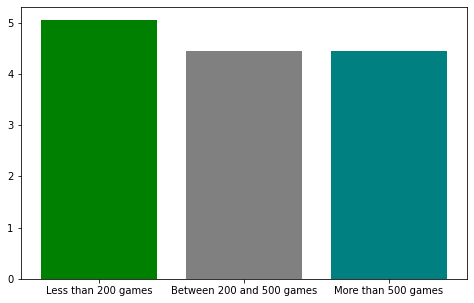

In [8]:
### We compare the aevrage rebounds, pts and assists across different categories
### Rebounds
less_than_200=round(df[(df['Player Longevity_Category']=='Less than 200 games')]['Average Rebounds'].mean(),2)
between_200_and_500=round(df[(df['Player Longevity_Category']=='Between 200 and 500 games')]['Average Rebounds'].mean(),2)
more_than_500=round(df[(df['Player Longevity_Category']=='More than 500 games')]['Average Rebounds'].mean(),2)
y=[less_than_200,between_200_and_500,more_than_500]
x=['Less than 200 games','Between 200 and 500 games','More than 500 games']
plt.figure(figsize=(8,5))
plt.bar(x,y,color=['green','grey','teal'])
# The barplot shows that players with less than 200 games tend to perform higher rebounds on average

<BarContainer object of 3 artists>

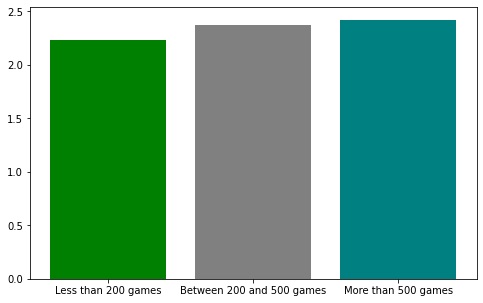

In [9]:
### We compare the aevrage rebounds, pts and assists across different categories
### Assists
less_than_200=round(df[(df['Player Longevity_Category']=='Less than 200 games')]['Average Assists'].mean(),2)
between_200_and_500=round(df[(df['Player Longevity_Category']=='Between 200 and 500 games')]['Average Assists'].mean(),2)
more_than_500=round(df[(df['Player Longevity_Category']=='More than 500 games')]['Average Assists'].mean(),2)
y=[less_than_200,between_200_and_500,more_than_500]
x=['Less than 200 games','Between 200 and 500 games','More than 500 games']
plt.figure(figsize=(8,5))
plt.bar(x,y,color=['green','grey','teal'])
# Contrary to rebounds, players with more than 200 games outperforme those with less than 200 games 

<BarContainer object of 3 artists>

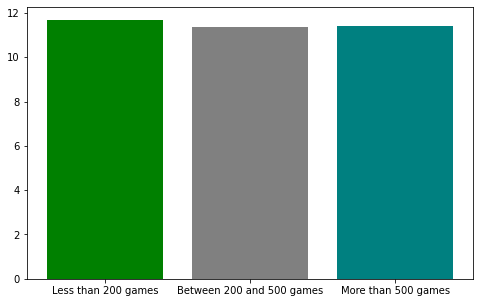

In [10]:
### We compare the aevrage rebounds, pts and assists across different categories
### Points per Game
less_than_200=round(df[(df['Player Longevity_Category']=='Less than 200 games')]['Points per Game'].mean(),2)
between_200_and_500=round(df[(df['Player Longevity_Category']=='Between 200 and 500 games')]['Points per Game'].mean(),2)
more_than_500=round(df[(df['Player Longevity_Category']=='More than 500 games')]['Points per Game'].mean(),2)
y=[less_than_200,between_200_and_500,more_than_500]
x=['Less than 200 games','Between 200 and 500 games','More than 500 games']
plt.figure(figsize=(8,5))
plt.bar(x,y,color=['green','grey','teal'])
# While all three categories have the same points per game on average, players with less than 200 games tend to outperform
# those with more than 200 games 

 #### Longevity and Versatility

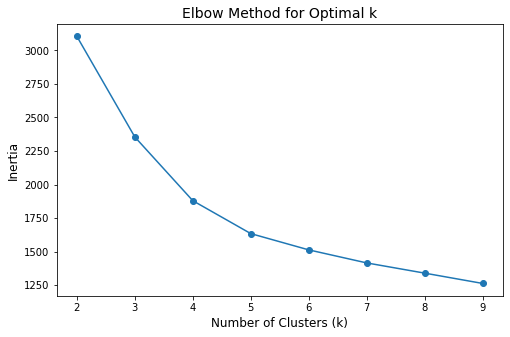

In [11]:
## We will perform a cluster analysis
features=[
                  'Average Minutes Played','Percentage Successful Shots','Percentage 3 PTS',
                  'Percentage Free Throws','Average Rebounds','Average Assists','Average Steals',
                  'Average Blocks','Points per Game']
df_features=df[features]
scaler=StandardScaler()
df_features=scaler.fit_transform(df_features)
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.show()

optimal_k = 5  #based on the elbow method graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_features)


In [12]:
df['Cluster']=clusters
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

         Average Minutes Played  Percentage Successful Shots  \
Cluster                                                        
0                     32.517632                    45.150132   
1                     26.564211                     0.488947   
2                     26.946557                    55.634754   
3                     25.953646                    44.846354   
4                     17.995745                    48.070638   

         Percentage 3 PTS  Percentage Free Throws  Average Rebounds  \
Cluster                                                               
0               34.435789               77.263289          5.449474   
1                0.305526                0.756316          5.076316   
2               23.144590               68.107541          7.690000   
3               35.462500               77.189219          3.949271   
4               30.543511               71.839149          3.974681   

         Average Assists  Average Steals  Average Blo

 #### Longevity and Versatility

In [16]:
## We will identify the top 10 scorers among veterans (more than 500 games)
features=['Player','Total Games Played','Points per Game']
df_features=df[features]
df_features_more_than_500=df_features[(df_features['Total Games Played']>500)]
df_features_more_than_500.sort_values('Points per Game',ascending=False).head(10)

,Player,Total Games Played,Points per Game
10,Giannis Antetokounmpo,884,23.71
268,CJ McCollum,764,19.58
334,Kristaps Porziņģis,519,18.80
298,Jamal Murray,570,18.47
159,Tobias Harris,992,16.27
145,Eric Gordon,982,15.83
169,Buddy Hield,768,15.77
77,Jordan Clarkson,802,15.66
232,Kyle Kuzma,529,14.96
45,Malcolm Brogdon,579,14.65


#### Early Career VS Late Career Trends

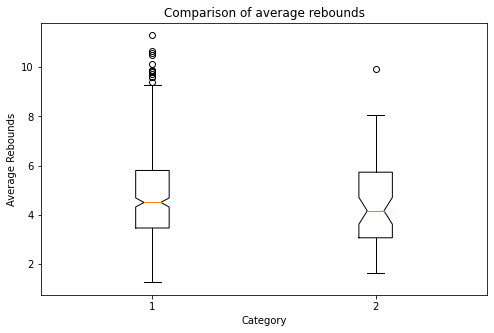

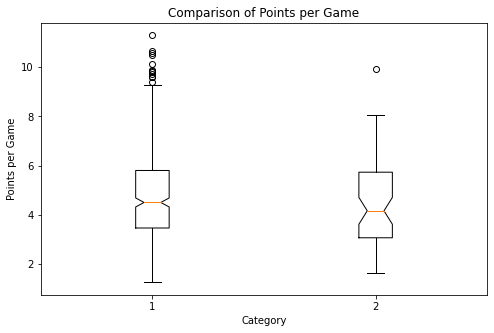

In [23]:
## Compare average points and rebounds for players with fewer games (<100) compared to those with more than 500 games
features=['Player','Total Games Played','Points per Game','Average Rebounds']
df_features=df[features]
df_features_less_than_100=df_features[(df_features['Total Games Played']<500)]
df_features_more_than_500=df_features[(df_features['Total Games Played']>500)]
## Rebounds
rebs_less_than_100=df_features_less_than_100['Average Rebounds']
rebs_more_than_500=df_features_more_than_500['Average Rebounds']
plt.figure(figsize=(8,5))
plt.boxplot([rebs_less_than_100,rebs_more_than_500],['Less then 100','More than 500'])
plt.title('Comparison of average rebounds')
plt.xlabel('Category')
plt.ylabel('Average Rebounds')
plt.show()
## Points per game
pts_less_than_100=df_features_less_than_100['Points per Game']
pts_more_than_500=df_features_more_than_500['Points per Game']
plt.figure(figsize=(8,5))
plt.boxplot([rebs_less_than_100,rebs_more_than_500],['Less then 100','More than 500'])
plt.title('Comparison of Points per Game')
plt.xlabel('Category')
plt.ylabel('Points per Game')
plt.show()


###### The plot reveals that newer players generally surpass veteran players in average rebounds. Furthermore, the boxplot for players with fewer games played highlights some outliers, supporting this observation. Similarly, newer players tend to outperform veterans in points per game. These findings underscore the potential impact of age on individual performance.